#### mini project 2 ####
#### question 2 ####
#### Mina Ilkhani ####
#### 610398191 ####

read *train set*:

In [106]:
import pandas as pd
train = pd.read_csv('./Problem 2/train_set.csv')
train.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,target
0,0.11460,20.0,6.96,0.0,0.464,6.538,58.7,3.9175,3.0,223.0,18.6,394.96,7.73,24.4
1,9.39063,0.0,18.10,0.0,0.740,5.627,93.9,1.8172,24.0,666.0,20.2,396.90,22.88,12.8
2,2.37857,0.0,18.10,0.0,0.583,5.871,41.9,3.7240,24.0,666.0,20.2,370.73,13.34,20.6
3,0.05302,0.0,3.41,0.0,0.489,7.079,63.1,3.4145,2.0,270.0,17.8,396.06,5.70,28.7
4,0.14150,0.0,6.91,0.0,0.448,6.169,6.6,5.7209,3.0,233.0,17.9,383.37,5.81,25.3


In [107]:
trainSize = len(train)
trainSize

406

In [108]:
headNames = train.columns
headNames

Index(['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11',
       'f12', 'f13', 'target'],
      dtype='object')

In [109]:
import numpy as np
def MSE(X,Y, w):
    Y_hat = np.dot(X,w)
    return ((pow(np.subtract(Y,Y_hat),2)) .sum()) / len(X)

$$ X_{standard} = (X-E[X]) / \sqrt(var(X)) $$
$$ E[X] = (1/n)\sum x = mean(X) $$
$$ var(X) = E[(x-E[X])^2] = (1/n)\sum(x_i-mean(X))^2 $$

In [111]:
def cal_E_X(X):
    E_X = (X.sum()) / len(X)
    return E_X

In [112]:
def cal_var(X,E_X):
    dif = X.subtract(E_X)
    difpow2 = pow(dif,2)
    sumOfDifpow2 = (difpow2.sum())
    return sumOfDifpow2 / len(X)

In [113]:
def cal_standard(X, E_X, var):
    return (X.subtract(E_X)) / (np.sqrt(var))

In [114]:
standardTrain = pd.DataFrame()
for col in headNames:
    E_X = cal_E_X(train[col])
    var = cal_var(train[col], E_X)
    standardTrain[col] = cal_standard(train[col],E_X,var)
standardTrain

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,target
0,-0.399550,0.395154,-0.617818,-0.282466,-0.790261,0.357484,-0.378985,0.063415,-0.749382,-1.085504,0.029377,0.407320,-0.705939,0.218918
1,0.614731,-0.473458,1.014199,-0.282466,1.598047,-0.918400,0.889019,-0.925517,1.659831,1.541751,0.789657,0.429288,1.427959,-1.039186
2,-0.151998,-0.473458,1.014199,-0.282466,0.239481,-0.576670,-0.984169,-0.027695,1.659831,1.541751,0.789657,0.132943,0.084237,-0.193220
3,-0.406284,-0.473458,-1.137895,-0.282466,-0.573928,1.115171,-0.220485,-0.173424,-0.864107,-0.806766,-0.350764,0.419776,-0.991868,0.685284
4,-0.396609,-0.473458,-0.625143,-0.282466,-0.928713,-0.159312,-2.255774,0.912550,-0.749382,-1.026198,-0.303246,0.276077,-0.976374,0.316530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,-0.405469,-0.473458,-1.277071,-0.282466,-0.582582,-0.181721,-0.015154,-0.236895,-0.749382,-1.263422,-0.350764,0.318428,0.057475,0.782896
402,-0.272836,-0.473458,1.231020,3.540245,0.429853,-0.045869,0.842189,-0.934369,-0.519933,-0.017996,-1.823807,-0.227269,-1.020038,0.500907
403,1.426195,-0.473458,1.014199,-0.282466,1.251916,-1.408585,1.040314,-1.109667,1.659831,1.541751,0.789657,0.429288,2.544910,-1.646547
404,-0.252071,-0.473458,1.231020,-0.282466,0.429853,1.689388,0.777348,-0.853147,-0.519933,-0.017996,-1.823807,0.174841,-1.551048,2.995425


add a column of ones to make the inner dot product easer

In [115]:
ones = [1 for _ in range(trainSize)]
standardTrain.insert(0, 'f0', ones)
standardTrain.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,target
0,1,-0.399550,0.395154,-0.617818,-0.282466,-0.790261,0.357484,-0.378985,0.063415,-0.749382,-1.085504,0.029377,0.407320,-0.705939,0.218918
1,1,0.614731,-0.473458,1.014199,-0.282466,1.598047,-0.918400,0.889019,-0.925517,1.659831,1.541751,0.789657,0.429288,1.427959,-1.039186
2,1,-0.151998,-0.473458,1.014199,-0.282466,0.239481,-0.576670,-0.984169,-0.027695,1.659831,1.541751,0.789657,0.132943,0.084237,-0.193220
3,1,-0.406284,-0.473458,-1.137895,-0.282466,-0.573928,1.115171,-0.220485,-0.173424,-0.864107,-0.806766,-0.350764,0.419776,-0.991868,0.685284
4,1,-0.396609,-0.473458,-0.625143,-0.282466,-0.928713,-0.159312,-2.255774,0.912550,-0.749382,-1.026198,-0.303246,0.276077,-0.976374,0.316530


In [116]:
standardTrain.describe()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,target
count,406.0,4.060000e+02,4.060000e+02,4.060000e+02,4.060000e+02,4.060000e+02,4.060000e+02,4.060000e+02,4.060000e+02,4.060000e+02,4.060000e+02,4.060000e+02,4.060000e+02,4.060000e+02,4.060000e+02
mean,1.0,3.035339e-17,-4.211191e-17,-1.350862e-16,-1.758309e-16,-5.430795e-16,-1.490324e-16,-2.286075e-16,-2.545856e-16,-1.594237e-16,9.331616e-17,2.575936e-16,4.589924e-16,-9.926378e-17,-2.091923e-17
std,0.0,1.001234e+00,1.001234e+00,1.001234e+00,1.001234e+00,1.001234e+00,1.001234e+00,1.001234e+00,1.001234e+00,1.001234e+00,1.001234e+00,1.001234e+00,1.001234e+00,1.001234e+00,1.001234e+00
min,1.0,-4.113902e-01,-4.734578e-01,-1.570072e+00,-2.824663e-01,-1.473870e+00,-3.811896e+00,-2.389059e+00,-1.230676e+00,-9.788312e-01,-1.299005e+00,-2.821675e+00,-4.036615e+00,-1.551048e+00,-1.885153e+00
25%,1.0,-4.032711e-01,-4.734578e-01,-8.771239e-01,-2.824663e-01,-8.854467e-01,-5.626649e-01,-8.220658e-01,-7.983748e-01,-6.346579e-01,-7.622863e-01,-5.408338e-01,1.939502e-01,-7.816470e-01,-6.053573e-01
50%,1.0,-3.843390e-01,-4.734578e-01,-2.178710e-01,-2.824663e-01,-1.499172e-01,-1.242988e-01,3.144545e-01,-2.786830e-01,-5.199334e-01,-4.538952e-01,2.669643e-01,3.674601e-01,-1.897192e-01,-1.552596e-01
75%,1.0,-1.001293e-02,6.942479e-02,1.014199e+00,-2.824663e-01,5.942657e-01,4.705765e-01,8.962231e-01,6.285204e-01,1.659831e+00,1.541751e+00,7.896571e-01,4.217863e-01,6.194720e-01,2.839925e-01
max,1.0,9.316968e+00,3.869603e+00,2.426466e+00,3.540245e+00,2.731628e+00,3.497473e+00,1.108758e+00,3.928644e+00,1.659831e+00,1.808628e+00,1.644973e+00,4.292884e-01,3.413963e+00,2.995425e+00


Now splitting X and target:

In [117]:
def X_Y_spliter(dataSet):
    X = dataSet.drop(['target'],  axis=1)
    Y = dataSet['target']
    return X, Y

## Implement normal-based regression with regularization ##
just like the first question, but with regularization.
$$ W = (X^{T}X+\lambda I)^{-1}X^{T}Y $$

In [118]:
from numpy.linalg import inv

def regular_normal_regression(X, Y, landa): # landa : lamnda
    XtrainNP = X.to_numpy()
    XtrainTranspose = XtrainNP.transpose()
    I = np.identity(XtrainNP.shape[1])
    XtrainTransposeDOTXtrainPLUSLambda = np.dot(XtrainTranspose,X)+landa*I
    XtrainTransposeDOTXtrainInv = inv(XtrainTransposeDOTXtrainPLUSLambda)
    XtrainTransposeDOTXtrainInvDOTXtrainTranspose = np.dot(XtrainTransposeDOTXtrainInv,XtrainTranspose)
    W = np.dot(XtrainTransposeDOTXtrainInvDOTXtrainTranspose, Y)
    return W

## 5-fold cross validation:

spliting train set and validation set(for i-th fold):

In [119]:
foldSize = int(0.2 * standardTrain.shape[0])

def get_train_val_set(dataSet, i):

    trainSetFold = pd.DataFrame()
    valSetFold = pd.DataFrame()
    
    startVal = i*foldSize
    endVal = (i+1)*foldSize

    valSetFold = dataSet.iloc[startVal:endVal,].copy()
    trainSetFold = dataSet.iloc[0:startVal,].copy()
    trainSetFold = trainSetFold.append(dataSet.iloc[endVal:,].copy())
    return valSetFold, trainSetFold


five fold cross validation: This function returns W, MSE on each fold of train set and MSE on each fold of validation set

In [120]:
def five_fold_cross_val(trainSet, landa):
    W = []
    MSE_train = []
    MSE_val = []
    for i in range(5):
        valSetFold, trainSetFold = get_train_val_set(trainSet, i)

        XvalSetFold, YvalSetFold = X_Y_spliter(valSetFold)
        XtrainSetFold, YtrainSetFold = X_Y_spliter(trainSetFold)
        
        w = regular_normal_regression(XtrainSetFold, YtrainSetFold, landa)
        W.append(w)

        MSE_train.append(MSE(XtrainSetFold,YtrainSetFold,w))
        MSE_val.append(MSE(XvalSetFold,YvalSetFold,w))

    return W, MSE_train, MSE_val


In [121]:
from statistics import mean
landa_list = [0.0, 1, 10]

def feet_model(dataSet):    
    MSE_train_list = []
    MSE_val_list = []
    for landa in [0.0,1,10]:
        train_on_a_landa = []
        val_on_a_landa = []
        print(f"lambda = {landa}")
        for i in range(10):
            print('run',i)
            dataSet = dataSet.sample(frac=1)
            W, MSE_train, MSE_val = five_fold_cross_val(dataSet,landa)
            train_on_a_landa += MSE_train
            val_on_a_landa += MSE_val
            print("W:")
            for j in range(5):
                print(f'for the {j}th fold\n', W[j])
        MSE_train_list.append(train_on_a_landa)
        MSE_val_list.append(val_on_a_landa)

          
    return (MSE_train_list, MSE_val_list)

## linear equation:

In [122]:
MSE_train_linear,MSE_val_linear = feet_model(standardTrain)
for i in range(3):
    landa_list[i]
    print( f"mean MES train set(lambda={landa_list[i]}):     ", mean(MSE_train_linear[i]))
    print( f"mean MES validation set(lambda={landa_list[i]}):", mean(MSE_val_linear[i]))
    print()

lambda = 0.0
run 0
W:
for the 0th fold
 [ 0.01297445 -0.11285605  0.13806864  0.01280883  0.04369116 -0.2445185
  0.28010135  0.04083319 -0.33227682  0.32296917 -0.2209246  -0.22471051
  0.08671294 -0.42649119]
for the 1th fold
 [ 0.00452175 -0.0933649   0.12476351  0.04008152  0.05465456 -0.1963628
  0.29523602  0.04088689 -0.29814309  0.29043231 -0.27423231 -0.21412439
  0.07566314 -0.44291319]
for the 2th fold
 [-0.02350026 -0.08879838  0.10023292  0.04317835  0.03000017 -0.24793536
  0.272842    0.06912937 -0.26514182  0.30762351 -0.25473982 -0.21799855
  0.05910011 -0.46944982]
for the 3th fold
 [-0.01439217 -0.08312766  0.10867436  0.0538491   0.05509585 -0.19506639
  0.30366449  0.00602215 -0.27160126  0.24107461 -0.19765505 -0.22168929
  0.07361918 -0.4218125 ]
for the 4th fold
 [ 0.02150578 -0.13214843  0.10874335  0.09088566  0.07493526 -0.25074512
  0.34085321  0.01248493 -0.30907384  0.2880713  -0.21083868 -0.21303372
  0.09426838 -0.44634508]
run 1
W:
for the 0th fold
 [ 0

## cubic equation:

In [123]:
standardTrain3 = pd.DataFrame()
for i in range(1,4):
    for j in range(1,len(headNames)):
        standardTrain3[f'f{j}^{i}'] = np.power(standardTrain[f'f{j}'], i)
standardTrain3.insert(0, 'f0', ones)
standardTrain3.insert(0, 'target', standardTrain['target'])
standardTrain3.head()

,target,f0,f1^1,f2^1,f3^1,f4^1,f5^1,f6^1,f7^1,f8^1,...,f4^3,f5^3,f6^3,f7^3,f8^3,f9^3,f10^3,f11^3,f12^3,f13^3
0,0.218918,1,-0.399550,0.395154,-0.617818,-0.282466,-0.790261,0.357484,-0.378985,0.063415,...,-0.022537,-0.493527,0.045684,-0.054433,0.000255,-0.420834,-1.279069,0.000025,0.067578,-0.351805
1,-1.039186,1,0.614731,-0.473458,1.014199,-0.282466,1.598047,-0.918400,0.889019,-0.925517,...,-0.022537,4.081020,-0.774631,0.702639,-0.792780,4.572899,3.664735,0.492397,0.079113,2.911703
2,-0.193220,1,-0.151998,-0.473458,1.014199,-0.282466,0.239481,-0.576670,-0.984169,-0.027695,...,-0.022537,0.013734,-0.191771,-0.953254,-0.000021,4.572899,3.664735,0.492397,0.002350,0.000598
3,0.685284,1,-0.406284,-0.473458,-1.137895,-0.282466,-0.573928,1.115171,-0.220485,-0.173424,...,-0.022537,-0.189048,1.386833,-0.010719,-0.005216,-0.645212,-0.525100,-0.043156,0.073970,-0.975801
4,0.316530,1,-0.396609,-0.473458,-0.625143,-0.282466,-0.928713,-0.159312,-2.255774,0.912550,...,-0.022537,-0.801023,-0.004043,-11.478549,0.759925,-0.420834,-1.080671,-0.027886,0.021042,-0.930784


In [124]:
train_cubic,val_cubic = feet_model(standardTrain3)
for i in range(3):
    landa_list[i]
    print( f"mean MES train set(lambda={landa_list[i]}):     ", mean(train_cubic[i]))
    print( f"mean MES validation set(lambda={landa_list[i]}):", mean(val_cubic[i]))
    print()

lambda = 0.0
run 0
W:
for the 0th fold
 [-0.80639989 -0.65087278 -0.17059981 -0.03780616  0.24098252 -0.5143695
  0.19769458  0.02391316 -0.27152766 -0.41857876 -0.06691758 -0.12601609
 -0.17715611 -0.55522356  0.12761771  0.03756033  0.04141368 -0.08186386
 -0.12086589  0.11054674  0.09510127  0.20593153 -0.24034293  0.1210672
  0.07014894 -0.1450725   0.18827233 -0.00795644 -0.00222889 -0.03550004
  0.0097433   0.06490232  0.00903089  0.04548227 -0.04874853  0.51800473
 -0.07416196  0.00601511 -0.02045446 -0.03039223]
for the 1th fold
 [-0.33826393 -0.64023087 -0.01439601  0.16974752  0.03312966 -0.3036776
  0.27204583 -0.06101471 -0.24381334  0.18454009  0.12251618 -0.12018558
 -0.06026761 -0.3865314   0.13873678 -0.16551194  0.0822802  -0.01083918
 -0.08639462  0.10706984  0.07020318  0.06711215 -0.20996578  0.17804111
  0.03395138 -0.06797885  0.22434053 -0.00938208  0.05345691 -0.08629043
  0.00323303  0.03047361 -0.01618037  0.04569757 -0.01380756  0.11124925
 -0.15523264 -0.009

## quintic equation

In [125]:
standardTrain5 = pd.DataFrame()
for i in range(1,6):
    for j in range(1,len(headNames)):
        standardTrain5[f'f{j}^{i}'] = np.power(standardTrain[f'f{j}'], i)
standardTrain5.insert(0, 'f0', ones)
standardTrain5.insert(0, 'target', standardTrain['target'])
standardTrain5.head()

,target,f0,f1^1,f2^1,f3^1,f4^1,f5^1,f6^1,f7^1,f8^1,...,f4^5,f5^5,f6^5,f7^5,f8^5,f9^5,f10^5,f11^5,f12^5,f13^5
0,0.218918,1,-0.399550,0.395154,-0.617818,-0.282466,-0.790261,0.357484,-0.378985,0.063415,...,-0.001798,-0.308213,0.005838,-0.007818,1.025550e-06,-0.236329,-1.507151,2.187801e-08,0.011212,-0.175322
1,-1.039186,1,0.614731,-0.473458,1.014199,-0.282466,1.598047,-0.918400,0.889019,-0.925517,...,-0.001798,10.421924,-0.653369,0.555334,-6.790809e-01,12.598515,8.711059,3.070385e-01,0.014580,5.937156
2,-0.193220,1,-0.151998,-0.473458,1.014199,-0.282466,0.239481,-0.576670,-0.984169,-0.027695,...,-0.001798,0.000788,-0.063773,-0.923310,-1.629340e-08,12.598515,8.711059,3.070385e-01,0.000042,0.000004
3,0.685284,1,-0.406284,-0.473458,-1.137895,-0.282466,-0.573928,1.115171,-0.220485,-0.173424,...,-0.001798,-0.062271,1.724673,-0.000521,-1.568719e-04,-0.481767,-0.341773,-5.309737e-03,0.013034,-0.959995
4,0.316530,1,-0.396609,-0.473458,-0.625143,-0.282466,-0.928713,-0.159312,-2.255774,0.912550,...,-0.001798,-0.690888,-0.000103,-58.408804,6.328262e-01,-0.236329,-1.138035,-2.564344e-03,0.001604,-0.887322


In [126]:
train_quintic, val_quintic = feet_model(standardTrain5)
for i in range(3):
    landa_list[i]
    print( f"mean MES train set(lambda={landa_list[i]}):     ", mean(train_quintic[i]))
    print( f"mean MES validation set(lambda={landa_list[i]}):", mean(val_quintic[i]))
    print()

lambda = 0.0
run 0
W:
for the 0th fold
 [ 8.06064162e-01 -1.00631776e+00 -6.26563919e-03 -4.07247275e-01
  3.34577733e+00 -2.68173565e-01  1.41615249e-01 -7.49532316e-02
 -1.08153435e-01 -1.47142078e+00 -6.29559146e-02 -8.03937228e-03
  1.05945477e-01 -3.68925012e-01  3.42323318e-01  5.42094864e-01
 -4.58332341e-02 -1.34838523e-01 -3.99945568e-01  1.96252652e-01
 -1.58839302e-02  9.59795832e-02 -6.68101385e+00  2.04698938e+00
 -6.77707472e-02 -1.68858166e-01 -5.82846726e-02 -8.04955060e-02
 -6.90555136e-01  7.28528453e-02 -3.09771964e-02  6.99964729e-02
  6.57933718e-02  3.94195814e-02 -2.82380143e-01 -7.73395936e+00
  3.26721803e+00 -1.02076353e-01 -5.08946578e-01 -1.21851761e-01
  1.07523297e-02  2.40737015e-01  9.64502886e-03 -5.08279176e-02
  1.67566129e-01 -1.48654886e-02  7.87884383e-02  1.60100456e-01
  7.41715237e-01  5.94894263e-02  2.15852751e-02 -2.43332368e-01
  1.10987441e-01 -5.45624491e-04 -2.58152559e-02 -4.79033425e-02
 -3.45867086e-03 -5.26754130e-02 -5.79666395e-03  

### Boxplot:

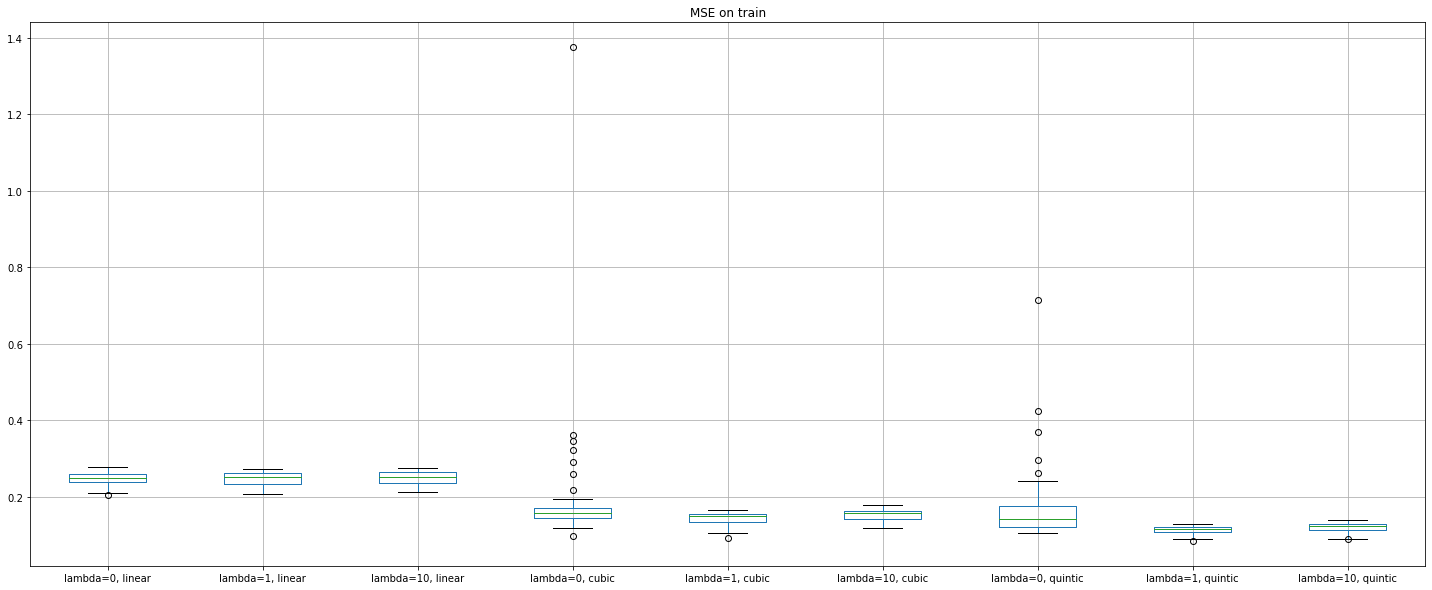

In [127]:

import matplotlib.pyplot as plt
newDF = pd.DataFrame()
newDF['lambda=0, linear'] = MSE_train_linear[0]
newDF['lambda=1, linear'] = MSE_train_linear[1]
newDF['lambda=10, linear'] = MSE_train_linear[2]

newDF['lambda=0, cubic'] = train_cubic[0]
newDF['lambda=1, cubic'] = train_cubic[1]
newDF['lambda=10, cubic'] = train_cubic[2]

newDF['lambda=0, quintic'] = train_quintic[0]
newDF['lambda=1, quintic'] = train_quintic[1]
newDF['lambda=10, quintic'] = train_quintic[2]
fig = plt.figure(figsize =(25, 10))
boxplot = newDF.boxplot(column=list(newDF.columns))
plt.title('MSE on train')
plt.show()

When lambda is zero MSE is very large on a few data is very large. So, we ignore lamdba = 0

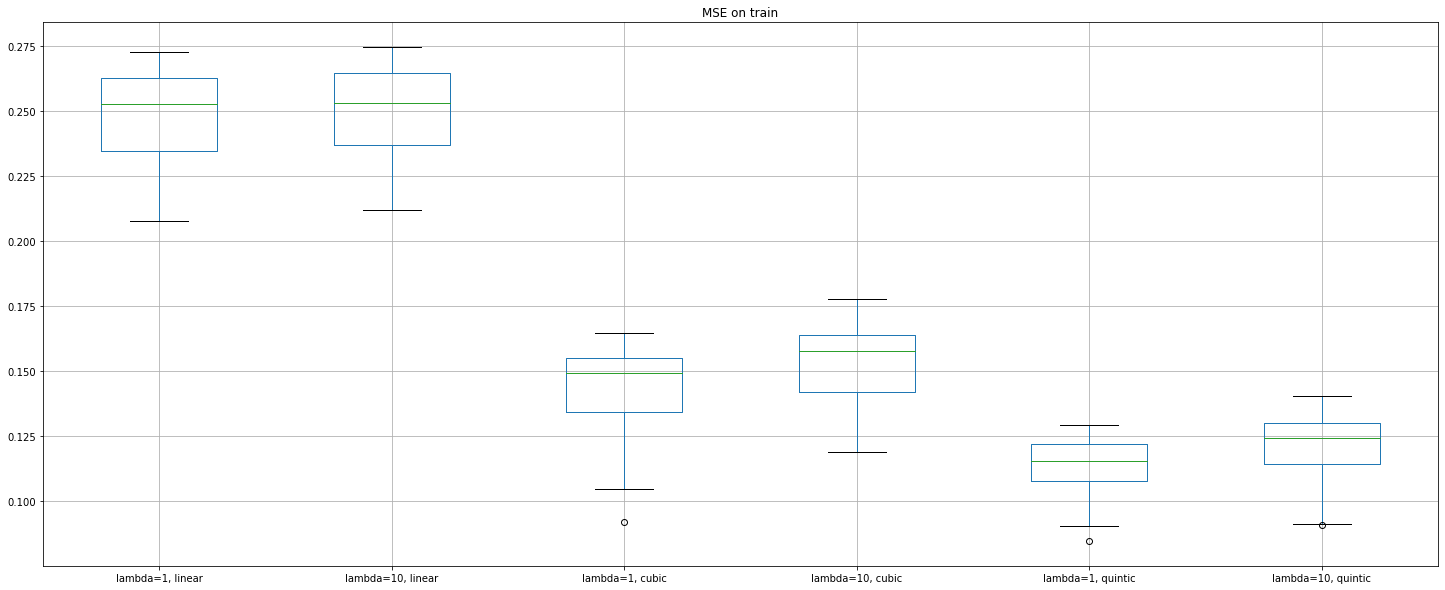

In [128]:
newDF = pd.DataFrame()
newDF['lambda=1, linear'] = MSE_train_linear[1]
newDF['lambda=10, linear'] = MSE_train_linear[2]

newDF['lambda=1, cubic'] = train_cubic[1]
newDF['lambda=10, cubic'] = train_cubic[2]

newDF['lambda=1, quintic'] = train_quintic[1]
newDF['lambda=10, quintic'] = train_quintic[2]
fig = plt.figure(figsize =(25, 10))
boxplot = newDF.boxplot(column=list(newDF.columns))
plt.title('MSE on train')
plt.show()

on train:\
It seems that MSE on quintic equation is less than MES on cubic equation and MES on cubic equation is less than linear equation
also, lambda = 1 seems a better choice than lambda = 10 \
So, quintic equation with lambda = 1 seems to be the best choice on train

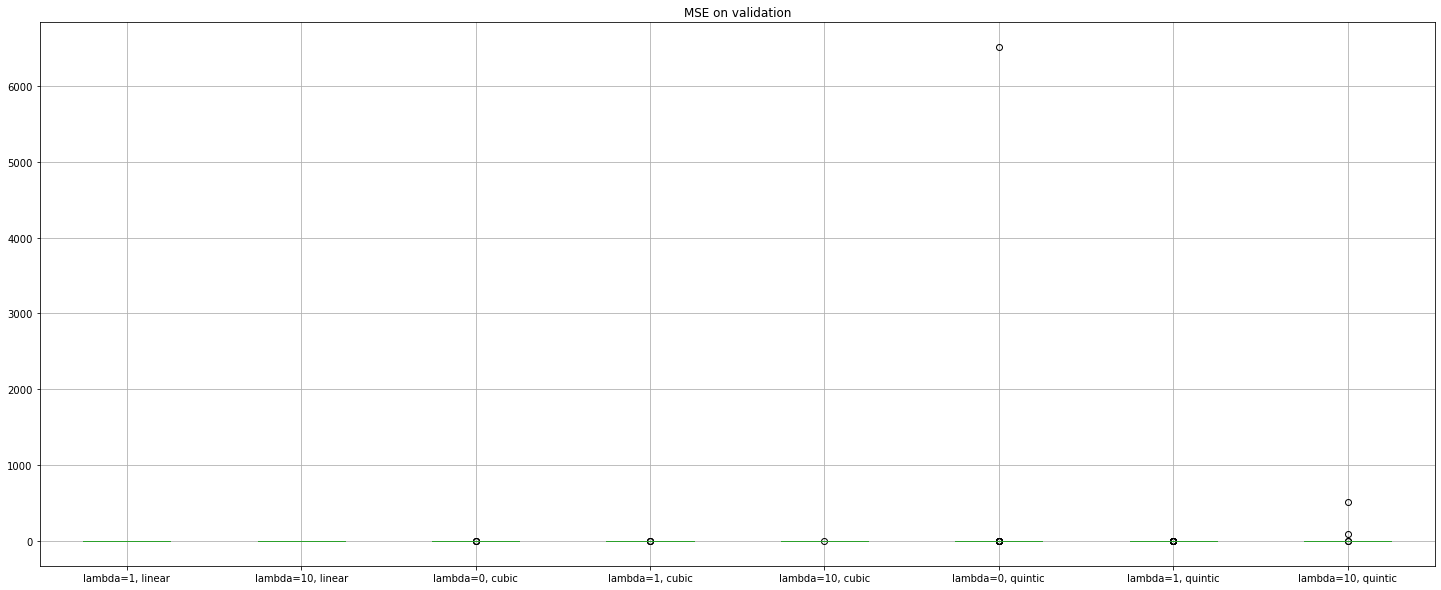

In [163]:
newDF = pd.DataFrame()
newDF['lambda=1, linear'] = MSE_val_linear[0]
newDF['lambda=1, linear'] = MSE_val_linear[1]
newDF['lambda=10, linear'] = MSE_val_linear[2]

newDF['lambda=0, cubic'] = val_cubic[0]
newDF['lambda=1, cubic'] = val_cubic[1]
newDF['lambda=10, cubic'] = val_cubic[2]

newDF['lambda=0, quintic'] = val_quintic[0]
newDF['lambda=1, quintic'] = val_quintic[1]
newDF['lambda=10, quintic'] = val_quintic[2]
fig = plt.figure(figsize =(25, 10))
boxplot = newDF.boxplot(column=list(newDF.columns))
plt.title('MSE on validation')
plt.show()

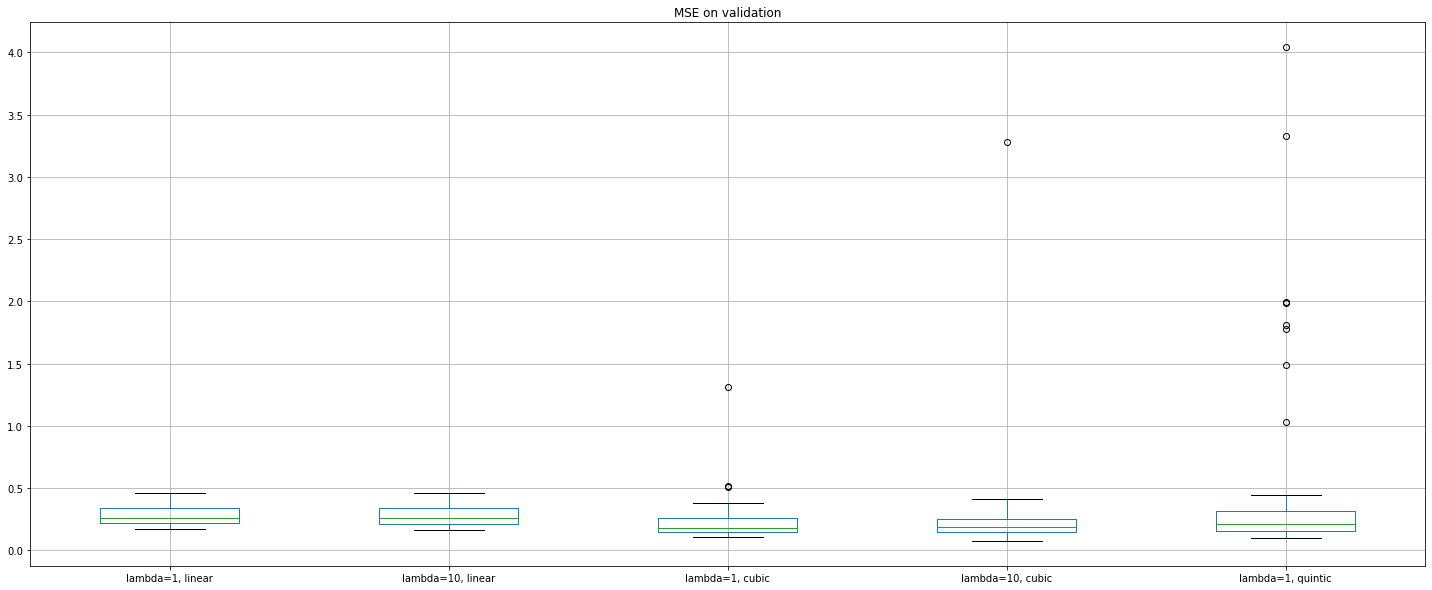

In [164]:
newDF = pd.DataFrame()
newDF['lambda=1, linear'] = MSE_val_linear[1]
newDF['lambda=10, linear'] = MSE_val_linear[2]

newDF['lambda=1, cubic'] = val_cubic[1]
newDF['lambda=10, cubic'] = val_cubic[2]

newDF['lambda=1, quintic'] = val_quintic[1]
# newDF['lambda=10, quintic'] = val_quintic[2]
fig = plt.figure(figsize =(25, 10))
boxplot = newDF.boxplot(column=list(newDF.columns))
plt.title('MSE on validation')
plt.show()

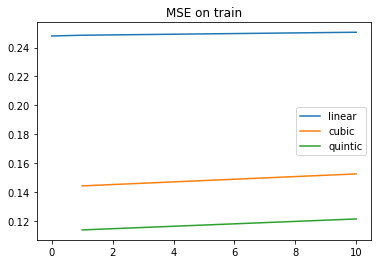

In [131]:
x1 = np.array(landa_list)
y1 = np.array([mean(MSE_train_linear[0]), mean(MSE_train_linear[1]), mean(MSE_train_linear[2])])
x2 = np.array(landa_list[1:])
y2 = np.array([ mean(train_cubic[1]), mean(train_cubic[2])])
x3 = np.array(landa_list[1:])
y3 = np.array([ mean(train_quintic[1]), mean(train_quintic[2])])

plt.title('MSE on train')
plt.plot(x1, y1,  label='linear')
plt.plot(x2, y2,  label='cubic')
plt.plot(x3, y3,  label='quintic')

plt.legend()

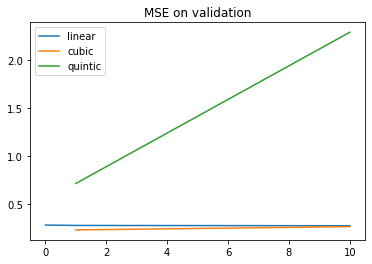

In [132]:
x1 = np.array(landa_list)
y1 = np.array([mean(MSE_val_linear[0]), mean(MSE_val_linear[1]), mean(MSE_val_linear[2])])
x2 = np.array(landa_list[1:])
y2 = np.array([ mean(val_cubic[1]), mean(val_cubic[2])])
x3 = np.array(landa_list[1:])
y3 = np.array([ mean(val_quintic[1]), mean(val_quintic[2])])

plt.title('MSE on validation')
plt.plot(x1, y1,  label='linear')
plt.plot(x2, y2,  label='cubic')
plt.plot(x3, y3,  label='quintic')

plt.legend()

I choose cubic equation with lambda = 1 as the best model. \
there is a complete talk about over fiting and underfiting on these models in the explanation file.

In [133]:
X,Y= X_Y_spliter(standardTrain3)
standardTrain3.shape
W =regular_normal_regression(X,Y,1)
W

array([-0.4023056 , -0.51770592, -0.03762903,  0.13295337,  0.1131669 ,
       -0.40569251,  0.21882034, -0.03138765, -0.26675454,  0.18198363,
        0.12668632, -0.1014835 , -0.08669593, -0.48157793,  0.09480231,
       -0.06330323,  0.03808856, -0.03363291, -0.11559221,  0.09226775,
        0.08250352,  0.12438391, -0.17541336,  0.19210168,  0.03424823,
       -0.07712388,  0.21680707, -0.00583893,  0.02483022, -0.05931034,
        0.00359832,  0.05394906, -0.00257332,  0.04820189, -0.02724225,
        0.10565898, -0.16230229, -0.01430166, -0.00890336, -0.04886028])

MSE on whole train:

In [134]:
MSE(X,Y,W)

0.14975427608295128

reading test set and standardization it:

In [135]:
test = pd.read_csv('./Problem 2/test_set.csv')
test.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13
0,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34
1,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
2,0.09103,0.0,2.46,0.0,0.488,7.155,92.2,2.7006,3.0,193.0,17.8,394.12,4.82
3,10.83420,0.0,18.10,0.0,0.679,6.782,90.8,1.8195,24.0,666.0,20.2,21.57,25.79
4,2.14918,0.0,19.58,0.0,0.871,5.709,98.5,1.6232,5.0,403.0,14.7,261.95,15.79


In [136]:
standardTest = pd.DataFrame()
for col in headNames[:-1]:
    E_X = cal_E_X(test[col])
    var = cal_var(test[col], E_X)
    standardTest[col] = cal_standard(test[col],E_X,var)
testSize = len(test)
ones = [1 for _ in range(testSize)]
standardTest.insert(0, 'f0', ones)
standardTest.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13
0,1,-0.505259,-0.545065,0.266749,-0.229416,-0.987994,-0.092672,-0.416832,0.579248,-0.535634,-0.114804,0.246245,0.385201,0.006584
1,1,-0.509852,-0.545065,-1.262908,-0.229416,-0.807794,0.211725,-0.246738,1.098399,-0.767511,-1.168270,0.246245,0.461200,-0.975442
2,1,-0.499292,-0.545065,-1.222692,-0.229416,-0.550366,1.326312,0.892892,-0.566688,-0.767511,-1.341852,-0.135859,0.461200,-1.029157
3,1,1.355048,-0.545065,1.023678,-0.229416,1.088598,0.752876,0.845265,-1.003119,1.667191,1.489337,0.883086,-3.206368,1.859072
4,1,-0.144042,-0.545065,1.236251,-0.229416,2.736142,-0.896712,1.107210,-1.100352,-0.535634,-0.084876,-1.451997,-0.839947,0.481757


#### cubic equation:

In [166]:
standardtest3 = pd.DataFrame()
for i in range(1,4):
    for j in range(1,len(headNames)):
        standardtest3[f'f{j}^{i}'] = np.power(standardTest[f'f{j}'], i)
standardtest3.insert(0, 'f0', ones)
standardtest3.head()

,f0,f1^1,f2^1,f3^1,f4^1,f5^1,f6^1,f7^1,f8^1,f9^1,...,f4^3,f5^3,f6^3,f7^3,f8^3,f9^3,f10^3,f11^3,f12^3,f13^3
0,1,-0.505259,-0.545065,0.266749,-0.229416,-0.987994,-0.092672,-0.416832,0.579248,-0.535634,...,-0.012075,-0.964414,-0.000796,-0.072424,0.194354,-0.153676,-0.001513,0.014931,0.057156,2.853534e-07
1,1,-0.509852,-0.545065,-1.262908,-0.229416,-0.807794,0.211725,-0.246738,1.098399,-0.767511,...,-0.012075,-0.527111,0.009491,-0.015021,1.325198,-0.452119,-1.594517,0.014931,0.098100,-9.281195e-01
2,1,-0.499292,-0.545065,-1.222692,-0.229416,-0.550366,1.326312,0.892892,-0.566688,-0.767511,...,-0.012075,-0.166707,2.333118,0.711863,-0.181983,-0.452119,-2.416094,-0.002508,0.098100,-1.090046e+00
3,1,1.355048,-0.545065,1.023678,-0.229416,1.088598,0.752876,0.845265,-1.003119,1.667191,...,-0.012075,1.290037,0.426747,0.603920,-1.009387,4.633997,3.303536,0.688666,-32.964026,6.425224e+00
4,1,-0.144042,-0.545065,1.236251,-0.229416,2.736142,-0.896712,1.107210,-1.100352,-0.535634,...,-0.012075,20.484048,-0.721038,1.357345,-1.332277,-0.153676,-0.000611,-3.061238,-0.592593,1.118109e-01


predicting test set:

In [138]:
Y_hat = np.dot(standardtest3,W)
Y_hat

array([-0.23393697,  0.69978168,  1.76013939, -1.04330682, -0.69701368,
       -1.31104782, -0.27053076,  2.43734816,  1.5109302 ,  1.3083207 ,
        0.37517089, -0.32135609, -0.09556921,  1.00598061,  0.4772228 ,
       -1.19308819, -0.75434245, -0.10147102,  1.27826007, -0.76764542,
        0.05423127, -0.14778851,  0.54342178, -0.7875529 ,  1.07516191,
       -0.20704804, -0.55368298,  1.28891472, -0.61162092,  1.4271096 ,
       -0.00878565, -0.07643851, -0.26176747,  0.7928995 ,  0.45268377,
       -0.26862644, -0.464511  , -1.04298729, -0.63965593, -0.14108179,
        0.81177976, -0.27964373, -1.32921301,  0.06753115,  1.5542384 ,
       -0.0906308 , -0.37312309, -0.74331915, -0.40497293, -1.4200713 ,
       -0.72224785, -0.1163259 , -0.66370441,  1.14110165,  1.13124995,
        0.55435856, -0.49899193, -0.96269379,  0.2283957 , -0.13063344,
       -0.68929051, -0.02997314, -0.98983289,  0.474775  ,  1.54790409,
        0.43493804,  0.75014286,  1.50723027,  2.53300784, -1.44

save predictions:

In [139]:
import csv
	
with open('prediction.csv', 'w') as csvfile:

	csvwriter = csv.writer(csvfile)
	csvwriter.writerow(['target'])		
	for y in Y_hat:
		csvwriter.writerow([y])


In [140]:
test = pd.read_csv('./prediction.csv')
test

,target
0,-0.233937
1,0.699782
2,1.760139
3,-1.043307
4,-0.697014
...,...
95,-0.884898
96,-0.351462
97,-0.397954
98,0.094242
